Задача:

Используя только логистическую регрессию необходимо достичь точности в 100%

Импорты

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
x = np.array([[ 14.1045071 ,  -8.84201285,  11.92795253,  10.03525112,
          1.        ],
       [ 12.92517881,  -7.15096162,  12.27770352,  10.14551725,
          0.        ],
       [ 11.4415005 ,  -7.02107239,  11.95468206,   9.67503577,
          0.        ],
       [  9.760307  , -10.89008318,  12.06086788,  10.12557566,
          1.        ],
       [  9.75635735,  -9.10242256,  11.77429423,  10.27697556,
          1.        ],
       [ 11.45094082, -12.93838075,  11.90963693,  10.10075292,
          0.        ],
       [ 11.55070519,  -7.6348143 ,  11.95248132,  10.04204205,
          1.        ],
       [ 14.21377636, -12.05911538,  11.88569538,  10.83000588,
          0.        ],
       [  9.19423307,  -8.89199169,  11.9667496 ,   9.44503935,
          0.        ],
       [ 13.30127997, -12.02643867,  12.16383035,  10.2869096 ,
          1.        ],
       [ 10.08626013,  -7.67476205,  11.98344696,   9.9130986 ,
          0.        ],
       [ 10.06113018, -11.41554047,  12.05107694,  10.29845476,
          1.        ],
       [ 14.97195804, -10.00762098,  11.94963811,   9.99594818,
          0.        ],
       [ 14.21484961,  -7.94275796,  12.10190604,  10.18960329,
          0.        ],
       [ 14.32304338, -10.58379987,  11.93882847,  10.0712306 ,
          1.        ],
       [  9.59187554,  -8.2299092 ,  12.09781452,   9.86790174,
          0.        ],
       [ 10.48012568,  -8.16953586,  12.0087842 ,   9.55160614,
          1.        ],
       [ 13.28912495,  -7.96981417,  11.96385095,   9.29290971,
          1.        ],
       [ 10.97308148,  -7.81885567,  12.03911568,  10.61159965,
          1.        ],
       [ 10.04847858,  -8.58005153,  11.93645835,  10.47094325,
          1.        ],
       [  9.56139272, -11.7389407 ,  11.84643243,  10.57172613,
          0.        ],
       [ 12.90726914, -12.85400039,  11.94221847,  10.40850501,
          0.        ],
       [ 10.72489837,  -7.28771447,  12.10701306,   9.62685383,
          0.        ],
       [ 10.12092921, -12.31233449,  12.01538382,   8.76827368,
          0.        ],
       [  9.60477836,  -9.71733107,  12.01068143,  10.01653395,
          1.        ],
       [ 14.40480879,  -9.99896483,  11.98520159,  11.19238274,
          1.        ],
       [ 12.15174676, -12.40418459,  11.92193296,   9.20191439,
          1.        ],
       [ 10.74323574, -12.71771795,  12.0264107 ,  10.2284348 ,
          0.        ],
       [  9.2059039 , -11.09844621,  12.08170508,   9.39457665,
          0.        ],
       [ 14.89454   , -10.76527593,  12.03163412,   9.82054326,
          0.        ],
       [ 14.92889948,  -9.25060437,  12.11897106,   9.70507846,
          0.        ],
       [ 13.59162656, -12.54646874,  11.7635438 ,   9.81110764,
          0.        ],
       [ 12.17108062,  -7.03399081,  11.97229948,   9.75855796,
          0.        ],
       [ 12.75207654,  -7.73179092,  12.17398392,  10.05201742,
          1.        ],
       [ 14.61991493,  -8.53655219,  11.98957702,   9.57136889,
          0.        ],
       [ 14.1114866 , -11.14788585,  12.03760293,   9.9940323 ,
          1.        ],
       [ 11.5683851 , -12.35686414,  11.9434256 ,   9.95440127,
          1.        ],
       [ 12.14580098,  -7.62496044,  11.94622858,  10.355433  ,
          1.        ],
       [  9.63159633, -10.30147305,  12.02880271,  10.14716262,
          1.        ],
       [  9.01355891,  -9.63482138,  11.99543576,  10.20326111,
          0.        ],
       [ 13.76784131,  -8.35463064,  12.01458929,  10.00584986,
          1.        ],
       [ 12.74518651, -12.25448263,  11.98921512,   9.20234166,
          1.        ],
       [ 10.99481826, -12.17446641,  11.87663443,  10.27633606,
          1.        ],
       [ 12.19754579, -12.97443847,  11.91489843,  10.62554275,
          0.        ],
       [  9.01578722, -10.37555822,  11.94892041,  10.23553828,
          0.        ],
       [ 13.59693322,  -7.4637299 ,  11.88805974,   9.30992185,
          0.        ],
       [ 14.31873403,  -9.41214338,  12.1972719 ,  10.58115988,
          1.        ],
       [ 10.49219386, -11.86112432,  11.92899595,  10.51450146,
          1.        ],
       [ 13.76722144, -11.61981822,  11.98280592,   9.81121508,
          1.        ],
       [ 14.65735543, -11.47014874,  12.09581318,   9.85987108,
          0.        ]])

In [5]:
# Binary classification task
# label is target
# f1, f2, f3, f4 are features
df = pd.DataFrame(x, columns=["f1", "f2", "f3", "f4", "label"]).sample(frac=1)
df.head(5)

,f1,f2,f3,f4,label
35,14.111487,-11.147886,12.037603,9.994032,1.0
4,9.756357,-9.102423,11.774294,10.276976,1.0
23,10.120929,-12.312334,12.015384,8.768274,0.0
38,9.631596,-10.301473,12.028803,10.147163,1.0
44,9.015787,-10.375558,11.948920,10.235538,0.0


Данные представлены 4 фичами + целевая переменная.

Данные не имеют выбросов или пропущенных значений.

In [27]:
RANDOM_STATE = 123456
features = df.drop(columns = ['label'], axis = 1)
target = df['label']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = RANDOM_STATE)

Разделим датасет на обучающую выборку и тестовую, в соотношении 72/25, Shuffle = True указывать не будем, тк при создании таблицы мы перемешали все значения.

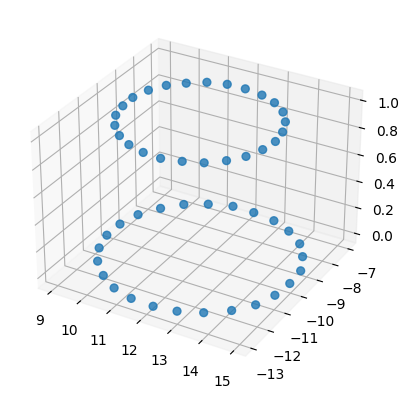

In [6]:
column_names = ['f1', 'f2', 'f3', 'f4']

# df = pd.DataFrame(features_train, columns=column_names)

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['f1'], df['f2'], df['label'], s=32, alpha=.8)

ax.xaxis.line.set_visible(False)
ax.yaxis.line.set_visible(False)
ax.zaxis.line.set_visible(False)

plt.show()


Как можно заметить, отношение фичей f1 и f2 на трехмерной плоскости, где третья представлена переменной label, можно четко увидеть, что наблюдается нелинейная связь.

In [28]:
# Создание пайплайна с последовательным применением полиномиального преобразования, стандартизации и нормализации
poly_preprocessing_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Полиномиальное преобразование
    # ('scaler', StandardScaler()),  # Стандартизация
    # ('normalizer', MinMaxScaler()),  # Нормализация
])

# Обучение пайплайна на обучающих данных
poly_preprocessing_pipeline.fit(features_train)

# Преобразование обучающих данных с помощью обученного пайплайна
features_train_transformed = poly_preprocessing_pipeline.transform(features_train)

# Преобразование тестовых данных с помощью обученного пайплайна
features_test_transformed = poly_preprocessing_pipeline.transform(features_test)


Из имеющегося "Джентельменского набора" для линейных моделей, состоящего из нормализации, стандартизации и полиноминализации фичей выбор остановился на полиноминализации данных, в силу того, что в данных присутствуют нелинейные связи (см. график выше)

In [29]:
model = LogisticRegression()

model.fit(features_train_transformed, target_train)

prediction_train = model.predict(features_train_transformed)
prediction_test = model.predict(features_test_transformed)

accuracy_train = accuracy_score(target_train, prediction_train)
accuracy_test = accuracy_score(target_test, prediction_test)

print(f'Точность на обучающем наборе данных составляет {accuracy_train:.02f}')

print(f'Точность на тестовом наборе данных составляет {accuracy_test:.02f}')

Точность на обучающем наборе данных составляет 1.00
Точность на тестовом наборе данных составляет 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Задача решена. Без применения полиноминализации переменных максимальная точность на данном наборе данных составляет 38%, однако "развязав нелинейность связей" мы смогли достичь необходимой точности.